## Regresión Lineal Preprocesado


---

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

#  Gestión de warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle("../files_rl/1-heart-eda.pk")
df.head()

,age,sex,chestpaintype,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,289.0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,180.0
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0,283.0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1,214.0
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0,195.0


### Usando el mismo dataset que usatéis ayer.


`Recordamos`

Variables predictoras:


- Age: edad del paciente en años

- Sex: sexo del paciente [M: Male, F: Female]

- ChestPainType: tipo de dolor de pecho [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

- RestingBP: presion sanguinea en reposo[mm Hg]

- Cholesterol: colesterol [mm/dl]

- FastingBS: azucar en sangre [1: if FastingBS > 120 mg/dl, 0: otherwise]

- RestingECG: electrocardiograma resultados [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: frecuencia cardiaca máxima alcanzada [Numeric value between 60 and 202]

- ExerciseAngina:  angina inducida por el ejercicio [Y: Yes, N: No]

- Oldpeak: oldpeak = ST pico mas bajo del electrocardiograma [Numeric value measured in depression]

- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


Variable respuesta:

- HeartDisease: cardiopatia [1: heart disease, 0: Normal]

### 1)Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.

#### 1.1 Identificamos si las variables categóricas tienen o no orden

In [3]:
df.dtypes

age                  int64
sex               category
chestpaintype     category
restingbp            int64
fastingbs         category
restingecg        category
maxhr                int64
exerciseangina    category
oldpeak            float64
st_slope          category
heartdisease      category
cholesterol        float64
dtype: object

In [4]:
df.restingecg.unique()

['Normal', 'ST', 'LVH']
Categories (3, object): ['LVH', 'Normal', 'ST']

In [5]:
df.exerciseangina.unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [6]:
df.st_slope.unique()

['Up', 'Flat', 'Down']
Categories (3, object): ['Down', 'Flat', 'Up']

`sex` = no tiene orden

`chestpaintype` = no tiene orden

`fastingbs` = tiene orden donde 1 tiene mas peso que 0

`restingecg` =  tiene orden  1 - Normal: Normal
                             2 - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                            3 - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
                           
`exerciseangina` = tiene orden 1 - 'N'
                             2 - 'Y'

`st_slope` = tiene orden  1- 'Flat'
                        2 - 'Down'
                        3- 'Up'


#### 1.2 Codificar variables categóricas  que NO tienen orden

In [7]:
categoricas_sinorden = df[["sex","chestpaintype"]]


In [8]:
categoricas_sinorden.shape

(917, 2)

In [9]:
dummies_sex = pd.get_dummies(categoricas_sinorden["sex"], prefix_sep = "_", prefix = "sex", dtype = int)
dummies_chest = pd.get_dummies(categoricas_sinorden["chestpaintype"], prefix_sep = "_", prefix = "chest", dtype = int)


In [10]:
df_dummies = pd.concat([df, dummies_sex,dummies_chest], axis = 1)
df_dummies.head(2)

,age,sex,chestpaintype,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0,289.0,0,1,0,1,0,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1,180.0,1,0,0,0,1,0


In [11]:
df_dummies.drop(["sex","chestpaintype"], axis=1, inplace=True)

In [12]:
df_dummies.head(2)

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,140,0,Normal,172,N,0.0,Up,0,289.0,0,1,0,1,0,0
1,49,160,0,Normal,156,N,1.0,Flat,1,180.0,1,0,0,0,1,0


#### 1.3 Codificar variables categóricas  que tienen orden

In [13]:
df_map = df_dummies.copy()

- Variable fastingbs

In [14]:
# fastingbs ya está dodificada conforme lo que se requiere
df_map.fastingbs.unique()

[0, 1]
Categories (2, int64): [0, 1]

- Variable restingecg

In [15]:
# Columna restingecg, observamos valores únicos
df_map.restingecg.unique()

['Normal', 'ST', 'LVH']
Categories (3, object): ['LVH', 'Normal', 'ST']

In [16]:
# Hacemos el mapa de la columna
mapa1 = {'Normal':1, 'ST':2, 'LVH':3}

In [17]:
# aplicamos el map a nuestra columna
df_map["restingecg"] = df_map["restingecg"].map(mapa1)

In [18]:
# Confimamos los cambios a través de los valores únicos
df_map["restingecg"].unique()

[1, 2, 3]
Categories (3, int64): [3, 1, 2]

- Variable exerciseangina

In [19]:
# Observamos valores únicos
df_map.exerciseangina.unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [20]:
# Hacemos el mapa de la columna
mapa2 = {'N':1, 'Y':2}

In [21]:
# aplicamos el map a nuestra columna
df_map["exerciseangina"] = df_map["exerciseangina"].map(mapa2)

In [22]:
# Confimamos los cambios a través de los valores únicos
df_map.exerciseangina.unique()

[1, 2]
Categories (2, int64): [1, 2]

- Variable  st_slope

In [23]:
# Observamos los valores únicos
df_map["st_slope"].unique()

['Up', 'Flat', 'Down']
Categories (3, object): ['Down', 'Flat', 'Up']

In [24]:
# Hacemos el mapa de la columna
mapa3 = {'Up':3, 'Flat':1, 'Down':2}

In [25]:
# aplicamos el map a nuestra columna
df_map["st_slope"] = df_map["st_slope"].map(mapa3)

In [26]:
# Confimamos los cambios a través de los valores únicos
df_map["st_slope"].unique()

[3, 1, 2]
Categories (3, int64): [2, 1, 3]

In [27]:
df_map.head(2)

,age,restingbp,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,cholesterol,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,40,140,0,1,172,1,0.0,3,0,289.0,0,1,0,1,0,0
1,49,160,0,1,156,1,1.0,1,1,180.0,1,0,0,0,1,0


In [28]:
df_map.shape

(917, 16)

### 2)Estandarizar las variables numéricas de vuestro set de datos.


In [29]:
df.dtypes

age                  int64
sex               category
chestpaintype     category
restingbp            int64
fastingbs         category
restingecg        category
maxhr                int64
exerciseangina    category
oldpeak            float64
st_slope          category
heartdisease      category
cholesterol        float64
dtype: object

In [30]:
df1=df.copy()

In [31]:
df1.shape

(917, 12)

In [32]:
numericas=df1.select_dtypes(np.number)
numericas.head(2)

,age,restingbp,maxhr,oldpeak,cholesterol
0,40,140,172,0.0,289.0
1,49,160,156,1.0,180.0


In [33]:
robust= RobustScaler()

In [34]:
robust.fit(numericas)

RobustScaler()

In [35]:
x_robust= robust.transform(numericas)

In [36]:
numericas_robust=pd.DataFrame(x_robust, columns=numericas.columns)
numericas_robust.head(3)

,age,restingbp,maxhr,oldpeak,cholesterol
0,-1.076923,0.5,0.944444,-0.400000,0.870840
1,-0.384615,1.5,0.500000,0.266667,-1.185764
2,-1.307692,0.0,-1.111111,-0.400000,0.757632


In [37]:
df_estand = df_map.copy()
df_estand.shape

(917, 16)

In [38]:
#Eliminamos del df estandarizado las variables numericas.
df_estand.drop(numericas.columns, axis=1, inplace=True)
df_estand.head(2)

,fastingbs,restingecg,exerciseangina,st_slope,heartdisease,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA
0,0,1,1,3,0,0,1,0,1,0,0
1,0,1,1,1,1,1,0,0,0,1,0


In [39]:
df_estand[numericas_robust.columns]= numericas_robust

In [40]:
df_estand.head()

,fastingbs,restingecg,exerciseangina,st_slope,heartdisease,sex_F,sex_M,chest_ASY,chest_ATA,chest_NAP,chest_TA,age,restingbp,maxhr,oldpeak,cholesterol
0,0,1,1,3,0,0,1,0,1,0,0,-1.076923,0.5,0.944444,-0.400000,0.870840
1,0,1,1,1,1,1,0,0,0,1,0,-0.384615,1.5,0.500000,0.266667,-1.185764
2,0,2,1,3,0,0,1,0,1,0,0,-1.307692,0.0,-1.111111,-0.400000,0.757632
3,0,1,2,1,1,1,0,1,0,0,0,-0.461538,0.4,-0.833333,0.600000,-0.544255
4,0,1,1,3,0,0,1,0,0,1,0,0.000000,1.0,-0.444444,-0.400000,-0.902745


### 3)Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.


In [41]:
df_estand.shape

(917, 16)

In [42]:
df2=df_estand.copy()

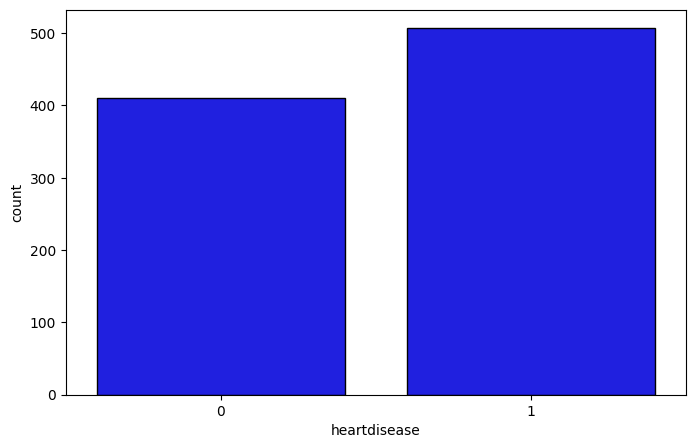

In [43]:
# distribucion de  nuestros datos en la variable respuesta.

plt.figure(figsize=(8,5))  

fig1 = sns.countplot(data = df2, x = "heartdisease",  color = "blue",  edgecolor='black')
fig1.set(xticklabels=["0", "1"]) 
plt.show()

In [44]:
df2.columns

Index(['fastingbs', 'restingecg', 'exerciseangina', 'st_slope', 'heartdisease',
       'sex_F', 'sex_M', 'chest_ASY', 'chest_ATA', 'chest_NAP', 'chest_TA',
       'age', 'restingbp', 'maxhr', 'oldpeak', 'cholesterol'],
      dtype='object')

In [45]:
# Separar en X e y y en train y test
X = df2.drop('heartdisease', axis=1)
y = df2['heartdisease']

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [46]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [47]:
y_train.value_counts()

1    345
0    296
Name: heartdisease, dtype: int64

In [48]:
y_train_res.value_counts()

0    323
1    323
Name: heartdisease, dtype: int64

In [49]:
# categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 1    345
0    296
Name: heartdisease, dtype: int64
..............................................................
Distribución después del ajuste 
 0    323
1    323
Name: heartdisease, dtype: int64


In [50]:
df2.shape

(917, 16)

In [51]:
df_bal_encod_estan = df2.copy()

## ver bien que se guarda porque el modelo solo genera una serie y el numero de filas es distinto de lo que trae le df

`Quedaría hacer con el df_map, es decir el df que solo categorizamos y no estandarizamos el balance`

#### Lo balanceamos solo con el df de encoding, sin estandarizar

In [52]:
df3= df_map.copy()

In [53]:
# Separar en X e y y en train y test
X1 = df3.drop('heartdisease', axis=1)
y1 = df3['heartdisease']

#dividimos en sets de entrenamiento y test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7)

In [54]:
# iniciamos el método
os_us1 = SMOTETomek()

# ajustamos el modelo
X1_train_res, y1_train_res = os_us1.fit_resample(X1_train, y1_train)

In [55]:
y1_train.value_counts()

1    362
0    279
Name: heartdisease, dtype: int64

In [56]:
y1_train_res.value_counts()

0    308
1    308
Name: heartdisease, dtype: int64

In [57]:
df_bal_encod= df3.copy()

### 4)Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.


In [58]:
# Guardamos el archivo categorizado
df_map.to_pickle("../files_rl/2-heart-encoding.pk")
#Guardamos el archivo categorizado y con estandarización
df_estand.to_pickle("../files_rl/3-heart-encoding-estandarizado.pk")
# Guardamos el archivo balancead, categorizado y con estandarización
df_bal_encod_estan.to_pickle("../files_rl/4-heart-bal_encoding-estandarizado.pk")
df_bal_encod_estan.to_csv("../files_rl/4-heart-bal_encoding-estandarizado.csv")
# Guardamos el archivo balancead, categorizado y con estandarización
df_bal_encod.to_pickle("../files_rl/4-heart-bal_encoding.pk")
df_bal_encod.to_csv("../files_rl/4-heart-bal_encoding.csv") # No hay cambios en el df cuando se aplica el balaceo